<a href="https://colab.research.google.com/github/Dhruv1603/Eggplant/blob/main/Eggplant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import required library

import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# Mount the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Eggplant/Original Images/

/content/drive/My Drive/Eggplant/Original Images


In [ ]:
# define batch, image_size, batch_size and epoches

images_size = 512
batch_size = 32
channels = 3
epoches=50

In [ ]:
# get data

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/Eggplant/Original Images/",
    shuffle=True,
    image_size=(images_size, images_size),
    batch_size=batch_size
)

Found 392 files belonging to 7 classes.


In [ ]:
# list out class name

class_names = dataset.class_names
class_names

['Eggplant Healthy Leaf',
 'Eggplant Insect Pest Disease',
 'Eggplant Leaf Spot Disease',
 'Eggplant Mosaic Virus Disease',
 'Eggplant Small Leaf Disease',
 'Eggplant White Mold Disease',
 'Eggplant Wilt Disease']

In [ ]:
len(dataset)

13

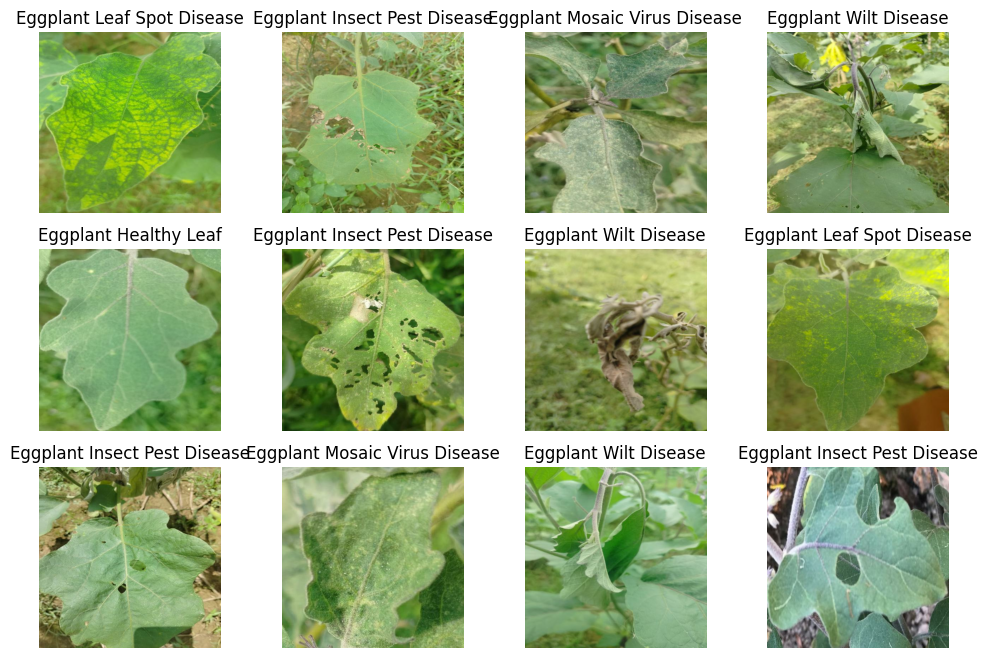

In [ ]:
# visualize 12 image with thier label

plt.figure(figsize=(12, 8))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i].numpy()])
    plt.axis("off")

In [ ]:
# split data into training, validation and testing sets

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)
  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

10

In [ ]:
len(val_ds)

1

In [ ]:
len(test_ds)

2

In [ ]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# resize by dividing by 255

resize_and_rescale = tf.keras.Sequential([
    layers.Rescaling(1.0/255, input_shape=(images_size, images_size, channels))
])

In [ ]:
# performining data augmentation

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [ ]:
len(class_names)

7

In [ ]:
# creating model

input_shape = (batch_size,images_size, images_size, channels)
n_claasses= len(class_names)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    # layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # layers.Dropout(0.2),
    # layers.Conv2D(128, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    # layers.Dropout(0.5),
    layers.Dense(n_claasses, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
# listing model detail

model.summary()

In [ ]:
# complie the model

model.compile(
    optimizer='adam',
    # loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
)

In [ ]:
from sys import version
history = model.fit(
    train_ds,
    epochs=epoches,
    batch_size=batch_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
10/10 [==============================] - 48s 858ms/step - loss: 2.8671 - accuracy: 0.2770 - val_loss: 1.8106 - val_accuracy: 0.2188
Epoch 2/50
10/10 [==============================] - 7s 492ms/step - loss: 1.6936 - accuracy: 0.2750 - val_loss: 1.6633 - val_accuracy: 0.2812
Epoch 3/50
10/10 [==============================] - 8s 628ms/step - loss: 1.6192 - accuracy: 0.3311 - val_loss: 1.6735 - val_accuracy: 0.2500
Epoch 4/50
10/10 [==============================] - 6s 487ms/step - loss: 1.5810 - accuracy: 0.3345 - val_loss: 1.5123 - val_accuracy: 0.2188
Epoch 5/50
10/10 [==============================] - 8s 598ms/step - loss: 1.6025 - accuracy: 0.3581 - val_loss: 1.6623 - val_accuracy: 0.3750
Epoch 6/50
10/10 [==============================] - 6s 474ms/step - loss: 1.5471 - accuracy: 0.3885 - val_loss: 1.6814 - val_accuracy: 0.4062
Epoch 7/50
10/10 [==============================] - 7s 472ms/step - loss: 1.5670 - accuracy: 0.3446 - val_loss: 1.4079 - val_accuracy: 0.4375
Epoch

In [ ]:
scores = model.evaluate(test_ds)

2/2 [==============================] - 2s 104ms/step - loss: 0.3929 - accuracy: 0.8438


In [ ]:
scores

[0.3929049074649811, 0.84375]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 10}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['accuracy']

[0.27702704071998596,
 0.2750000059604645,
 0.3310810923576355,
 0.33445945382118225,
 0.3581081032752991,
 0.3885135054588318,
 0.3445945978164673,
 0.4054054021835327,
 0.44594594836235046,
 0.4797297418117523,
 0.40878379344940186,
 0.5,
 0.5,
 0.4864864945411682,
 0.5405405163764954,
 0.5337837934494019,
 0.5687500238418579,
 0.6047297120094299,
 0.5574324131011963,
 0.559374988079071,
 0.590624988079071,
 0.6351351141929626,
 0.640625,
 0.6790540814399719,
 0.628125011920929,
 0.6790540814399719,
 0.6925675868988037,
 0.6385135054588318,
 0.5912162065505981,
 0.6468750238418579,
 0.6824324131011963,
 0.7364864945411682,
 0.7094594836235046,
 0.75,
 0.721875011920929,
 0.7331081032752991,
 0.7770270109176636,
 0.762499988079071,
 0.7736486196517944,
 0.78125,
 0.8062499761581421,
 0.787162184715271,
 0.7939189076423645,
 0.7804054021835327,
 0.7601351141929626,
 0.7229729890823364,
 0.8141891956329346,
 0.8074324131011963,
 0.762499988079071,
 0.7533783912658691]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

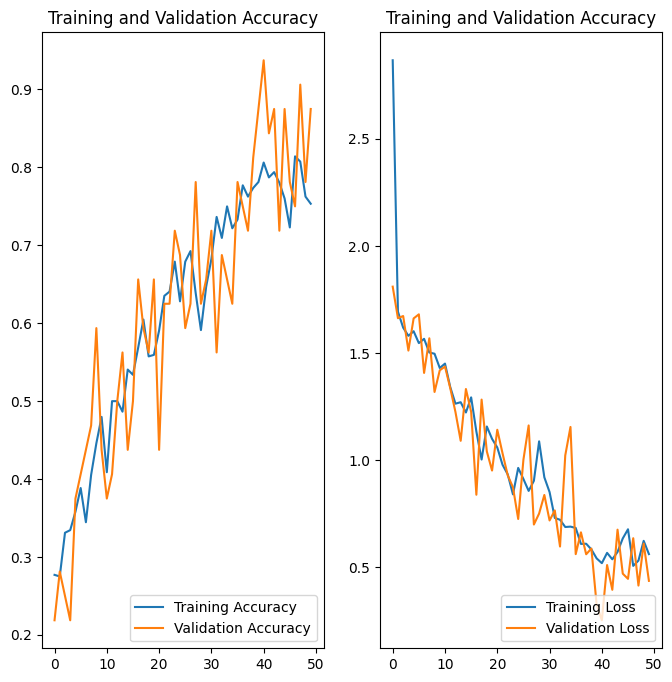

In [ ]:
# ploting accuracy and loss graph

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epoches), acc, label='Training Accuracy')
plt.plot(range(epoches), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epoches), loss, label='Training Loss')
plt.plot(range(epoches), val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

In [ ]:
import os
model_version = max([int(i) for i in os.listdir("/content/drive/My Drive/Eggplant/Models") + [0]]) +1
print(model_version)
model.save(f"/content/drive/My Drive/Eggplant/Models/{model_version}.h5")

3


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Thank You